In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
dataset = pd.read_csv('Dataset.csv')

# Check for missing values
print(dataset.isnull().sum())

# Fill missing values with the median of the respective columns
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].median(), inplace=True)
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].median(), inplace=True)

# Verify missing values are handled
print(dataset.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
P

In [ ]:
from sklearn.preprocessing import StandardScaler
# Select numerical columns for scaling (excluding 'CUST_ID')
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (z-score normalization)
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset[numerical_cols]), columns=numerical_cols)

# Preview the scaled dataset
print(dataset_scaled.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

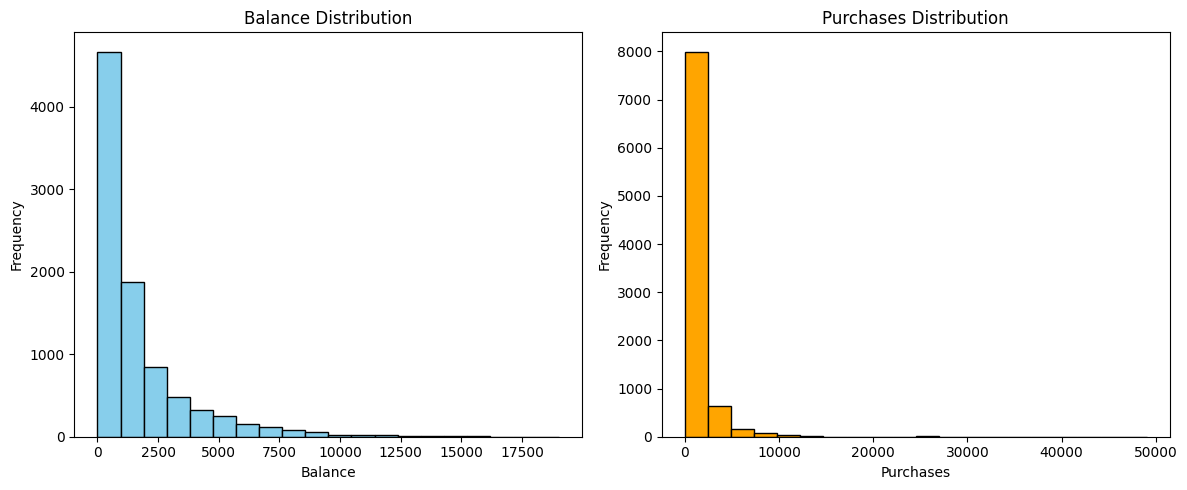

In [ ]:
# Plot histograms for Balance and Purchases
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dataset['BALANCE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dataset['PURCHASES'], bins=20, color='orange', edgecolor='black')
plt.title('Purchases Distribution')
plt.xlabel('Purchases')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


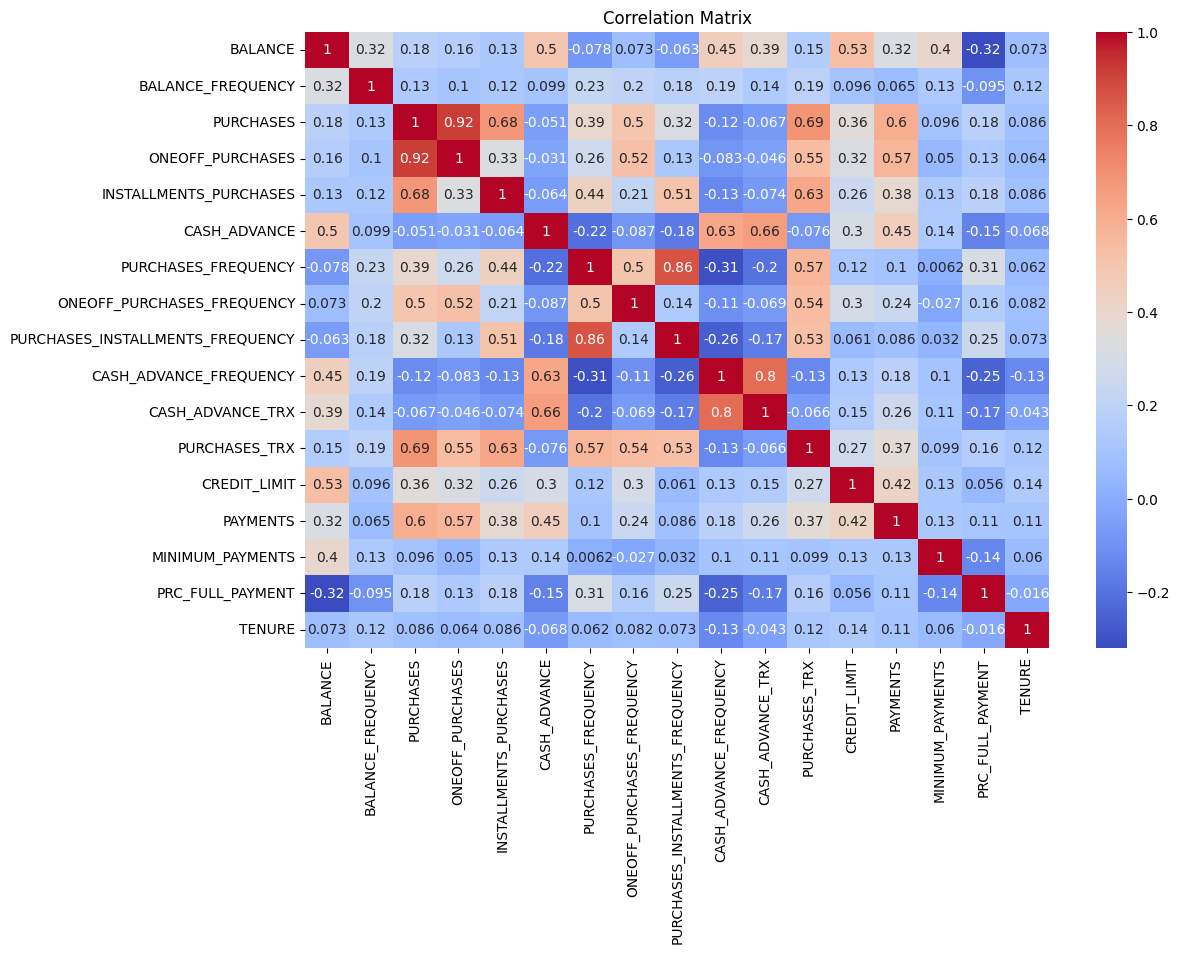

In [ ]:
# Compute the correlation matrix
corr_matrix = dataset_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


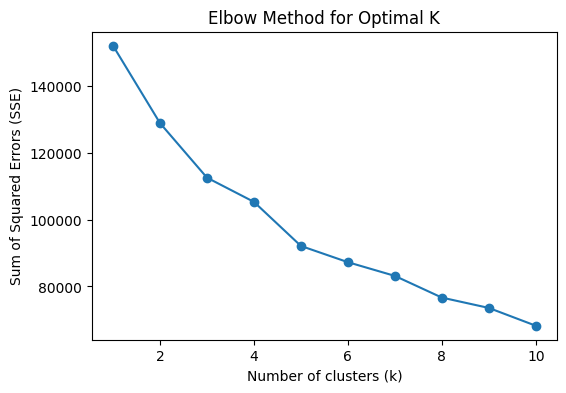

In [ ]:
from sklearn.cluster import KMeans
# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(dataset_scaled)

# Evaluate DBSCAN with silhouette score
silhouette_avg = silhouette_score(dataset_scaled, dbscan_labels)
print(f'DBSCAN Silhouette Score: {silhouette_avg}')


DBSCAN Silhouette Score: -0.4658992441861622


In [ ]:
# Apply K-Means clustering to the scaled data
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters based on your elbow method
kmeans.fit(dataset_scaled)

# Add the cluster labels from the scaled data to the original dataset
dataset['Cluster'] = kmeans.labels_
# Exclude non-numeric columns (like 'CUST_ID') from the grouping operation
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster and compute the mean for each feature in the original dataset
# cluster_profile = dataset.groupby('Cluster').mean()
# Group by cluster and compute the mean for each numeric feature
cluster_profile = dataset.groupby('Cluster')[numeric_columns].mean()


# Display the cluster profiles
print(cluster_profile)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

In [ ]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score for K-Means
kmeans_labels = kmeans.labels_
silhouette_avg = silhouette_score(dataset_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

print(f'DBSCAN Silhouette Score: {silhouette_avg}')


Silhouette Score for K-Means: 0.1664601900140412
DBSCAN Silhouette Score: 0.1664601900140412


In [ ]:
from sklearn.metrics import davies_bouldin_score
# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(dataset_scaled, kmeans_labels)
print(f'Davies-Bouldin Index for K-Means: {davies_bouldin}')


Davies-Bouldin Index for K-Means: 1.5720812351092013


Explained Variance Ratio by PCA components: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056
 0.04883426 0.04299203 0.03798259 0.03080002 0.02372251 0.0177337 ]
Number of components retained: 12


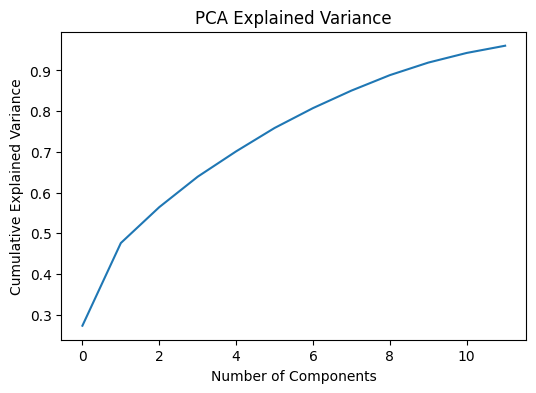

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
dataset_pca = pca.fit_transform(dataset_scaled)

# Print the explained variance ratio to see how much variance is retained
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio by PCA components: {explained_variance}")
print(f"Number of components retained: {pca.n_components_}")

# Visualizing the cumulative variance explained by PCA components
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=4, random_state=42)  # Adjust clusters based on previous analysis
kmeans_pca.fit(dataset_pca)

# Calculate silhouette score for K-Means clustering before PCA
kmeans_before_pca = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as necessary
kmeans_before_pca.fit(dataset_scaled)
silhouette_before_pca = silhouette_score(dataset_scaled, kmeans_before_pca.labels_)

# Calculate silhouette score for K-Means clustering after PCA
silhouette_after_pca = silhouette_score(dataset_pca, kmeans_pca.labels_)
# Calculate the silhouette score for the new clustering
silhouette_pca = silhouette_score(dataset_pca, kmeans_pca.labels_)

print(f'Silhouette Score before PCA: {silhouette_before_pca}')
print(f'Silhouette Score after PCA: {silhouette_pca}')


Silhouette Score before PCA: 0.1664601900140412
Silhouette Score after PCA: 0.2089636295067889


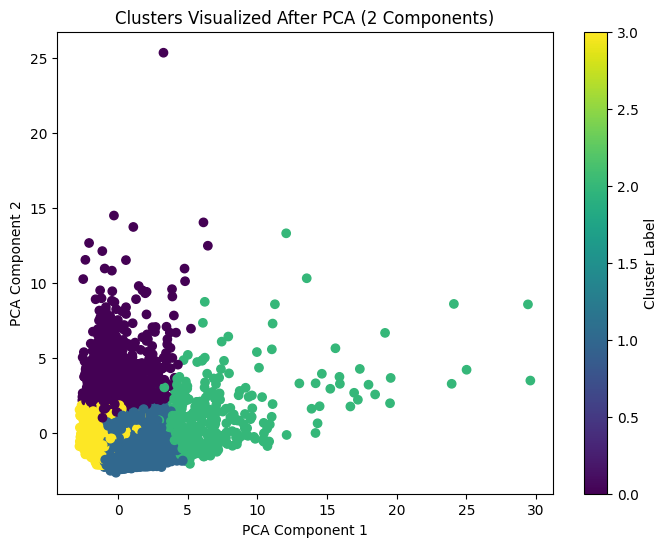

In [ ]:
# Reduce dimensions to 2 for visualization purposes
pca_2d = PCA(n_components=2)
dataset_pca_2d = pca_2d.fit_transform(dataset_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(dataset_pca_2d[:, 0], dataset_pca_2d[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('Clusters Visualized After PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
